In [50]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, f1_score

#from xgboost import XGBRegressor

In [51]:
mainDF = pd.read_csv(r'C:\Users\raadr\OneDrive\Desktop\AflAnalysis-\data\interim\H&AsesData.csv')
mainDF.columns.tolist()
#drop null values
mainDF = mainDF.dropna()

In [52]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'MinTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'homePosition', 'homePoints', 'MinutesSinceMidnight','homePercentage', 'awayPosition']]
Y = mainDF['Attendance']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [54]:
#Normalise Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for Random Search
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = GradientBoostingRegressor()

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Search
print("Random Search - Best Hyperparameters:", random_search.best_params_)

# Train the model with the best hyperparameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

Random Search - Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.1}


GradientBoostingRegressor(max_depth=4, min_samples_leaf=4, min_samples_split=10,
                          n_estimators=300)

In [56]:
y_pred = best_model.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 38709679.33975411
Mean Absolute Error: 4650.138899443
R-squared: 0.8525004220664264


In [58]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
234,53014,44198.019582
1580,22859,27709.571472
487,15862,17557.966299
806,24552,21720.007598
1244,46095,42903.715712
...,...,...
434,29391,27871.620749
911,16622,26657.232802
849,19086,33192.776857
272,10891,15163.203446


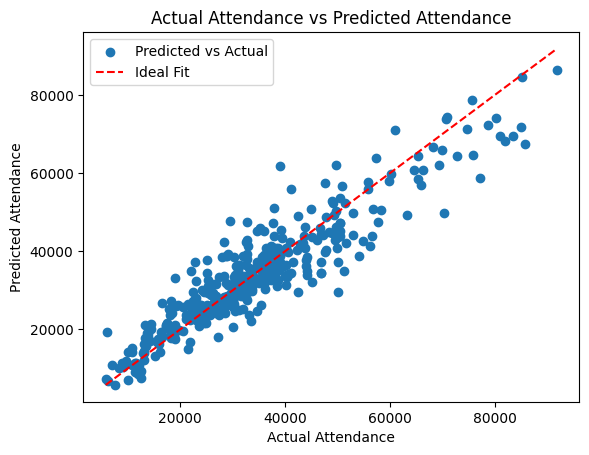

In [59]:
# Plot results
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.legend()
plt.show()


In [60]:
#plot feature importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Cat Boosting

In [61]:
from catboost import CatBoostRegressor

In [62]:
mainDF = pd.read_csv(r'C:\Users\raadr\OneDrive\Desktop\AflAnalysis-\data\interim\proCatH&ASes.csv')
mainDF.columns.tolist()
#drop null values
mainDF = mainDF.dropna()

In [63]:
categorical_features = ['Venue', 'HomeTeam', 'AwayTeam', 'Day', 'StartTime']
cbr = CatBoostRegressor(loss_function='RMSE', cat_features=categorical_features, random_state=42)

In [64]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'MinTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'homePosition', 'homePoints', 'StartTime','homePercentage', 'awayPosition']]
Y = mainDF['Attendance']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

c:\Users\raadr\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 15976.5168382	total: 76.6ms	remaining: 15.2s
1:	learn: 15187.0263368	total: 132ms	remaining: 13.1s
2:	learn: 14298.3098775	total: 218ms	remaining: 14.3s
3:	learn: 13655.8047197	total: 291ms	remaining: 14.3s
4:	learn: 12937.2651329	total: 369ms	remaining: 14.4s
5:	learn: 12419.9229860	total: 443ms	remaining: 14.3s
6:	learn: 11849.4378624	total: 558ms	remaining: 15.4s
7:	learn: 11439.1545501	total: 646ms	remaining: 15.5s
8:	learn: 10993.5472244	total: 726ms	remaining: 15.4s
9:	learn: 10680.4943157	total: 802ms	remaining: 15.2s
10:	learn: 10311.8056109	total: 894ms	remaining: 15.4s
11:	learn: 9950.3822808	total: 995ms	remaining: 15.6s
12:	learn: 9637.1124176	total: 1.08s	remaining: 15.6s
13:	learn: 9450.0926888	total: 1.19s	remaining: 15.8s
14:	learn: 9220.4355996	total: 1.26s	remaining: 15.6s
15:	learn: 9019.8248062	total: 1.45s	remaining: 16.6s
16:	learn: 8859.1933666	total: 1.52s	remaining: 16.4s
17:	learn: 8705.1061188	total: 1.61s	remaining: 16.3s
18:	learn: 8525.0107517	to

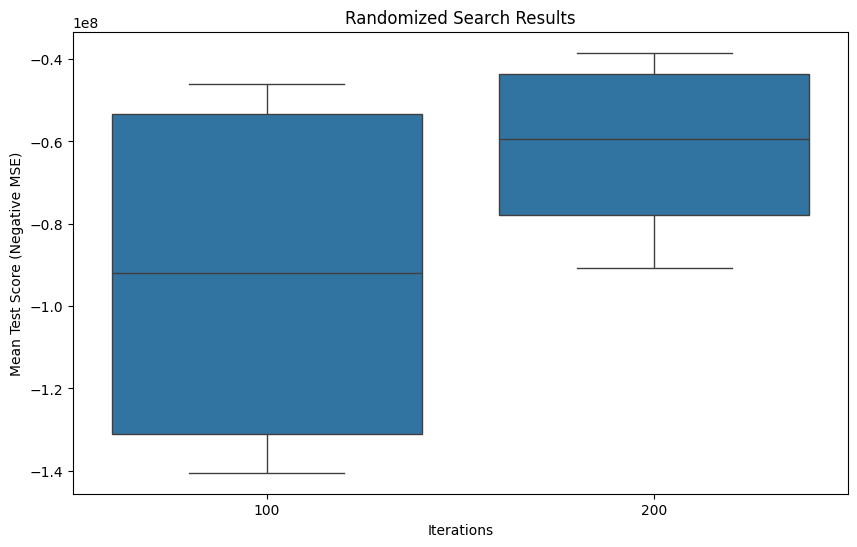

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define the scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Define the parameter distributions for Random Search
param_dist = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(cbr, param_distributions=param_dist, n_iter=10, cv=5, scoring=scorer, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Search
print("Random Search - Best Hyperparameters:", random_search.best_params_)
# Plot the results of the Randomized Search
results = pd.DataFrame(random_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.boxplot(x='param_iterations', y='mean_test_score', data=results)
plt.xlabel('Iterations')
plt.ylabel('Mean Test Score (Negative MSE)')
plt.title('Randomized Search Results')
plt.show()

In [67]:

# Specify the categorical features
categorical_features = ['Venue', 'HomeTeam', 'AwayTeam', 'Day', 'StartTime']

cbr.fit(X_train, y_train, cat_features=categorical_features)


Learning rate set to 0.043985
0:	learn: 16519.7421523	total: 45ms	remaining: 45s
1:	learn: 16092.1960607	total: 87.4ms	remaining: 43.6s
2:	learn: 15656.1494772	total: 140ms	remaining: 46.5s
3:	learn: 15270.2857193	total: 186ms	remaining: 46.3s
4:	learn: 14851.2294591	total: 237ms	remaining: 47.2s
5:	learn: 14467.1245876	total: 288ms	remaining: 47.7s
6:	learn: 14094.3369823	total: 338ms	remaining: 48s
7:	learn: 13761.6796477	total: 392ms	remaining: 48.7s
8:	learn: 13443.2835584	total: 445ms	remaining: 49s
9:	learn: 13132.6220353	total: 495ms	remaining: 49s
10:	learn: 12833.3910251	total: 565ms	remaining: 50.8s
11:	learn: 12596.8121099	total: 611ms	remaining: 50.3s
12:	learn: 12357.0526528	total: 657ms	remaining: 49.9s
13:	learn: 12130.8783979	total: 704ms	remaining: 49.6s
14:	learn: 11884.7534559	total: 753ms	remaining: 49.5s
15:	learn: 11687.1540886	total: 803ms	remaining: 49.4s
16:	learn: 11462.0206190	total: 855ms	remaining: 49.4s
17:	learn: 11265.2723679	total: 901ms	remaining: 49.1

In [31]:
y_pred = cbr.predict(X_test)

In [ ]:

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

In [ ]:
# Plot results
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.legend()
plt.show()


In [ ]:
%pip install lightgbm


In [36]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [37]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'MinTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'homePosition', 'homePoints', 'StartTime','homePercentage', 'awayPosition']]
Y = mainDF['Attendance']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
categorical_features = ['Venue', 'HomeTeam', 'AwayTeam', 'Day', 'StartTime']

for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# LightGBM model
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', boosting_type='gbdt')

# Define the parameter grid to search
param_dist = {
    'num_leaves': np.arange(8, 64),
    'learning_rate': np.logspace(-4, -1, 10),
    'max_depth': np.arange(3, 15),
    'feature_fraction': np.linspace(0.5, 1.0, 6),
    'bagging_fraction': np.linspace(0.5, 1.0, 6),
    'bagging_freq': np.arange(1, 8),
    'lambda_l1': np.logspace(-5, -1, 5),
    'lambda_l2': np.logspace(-5, -1, 5),
}

# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(lgb_model, param_distributions=param_dist, 
                                   n_iter=50,  # Number of parameter combinations to try
                                   scoring='neg_root_mean_squared_error',  # RMSE is the score metric
                                   cv=3,  # Cross-validation folds
                                   verbose=2,  # Prints the progress
                                   n_jobs=-1,  # Uses all cores
                                   random_state=42)

# We pass categorical_feature directly during model training inside the randomized search
# Ensure the categorical features are passed during training
def fit_model_with_categorical_features(X_train, y_train, categorical_features):
    # Create dataset for LightGBM
    train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
    return train_data

# Define a custom fit function that includes the categorical feature information
random_search.fit(X_train, y_train, 
                  categorical_feature=categorical_features)

# Output the best parameters found
print("Best hyperparameters found: ", random_search.best_params_)

# Get the best model from the random search
best_lgb_model = random_search.best_estimator_

In [ ]:

# Make predictions on the test set
y_pred = best_lgb_model.predict(X_test)

# Calculate the RMSE on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Final RMSE on test set: {mse}')

In [ ]:

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

In [ ]:
# Plot results
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.legend()
plt.show()
